# Tannis McCartney
## June 23, 2022
## Clustering - NS Housing Indicators

### Table of Contents
01 Import libraries

02 Import dataset

03 Wrangle data for cluster analysis

04 Apply elbow technique

05 k-means clustering

06 Visualize the clusters

07 Discussion

08 Descriptive statistics

09 Future steps

10 Export dataframe for time series analysis

# 01 Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
%matplotlib inline

# 02 Import data

In [3]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\6 Advanced Analytics and Dashboard Design\Nova Scotia Housing and Income'  

In [4]:
# Import NS housing market indicators
NSHousing = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'NSHousing_cleaned.pkl'))
NSHousing.head()

dwelling,total_starts,single_detached_starts,multiple_starts,semi_detached_starts,row_starts,apartment_starts,starts_by_market,freehold_homeownership_starts,rental_starts,condominium_ownership_starts,...,bachelor_average_rent_dollars,one_bedroom_average_rent,two_bed_average_rent_dollars,three_plus_bed_average_rent_dollars,july_1_population_thousands,labour_force_participation_rate_percent,pct_change_employment,pct_change_unemployment,pct_change_real_disposable_income,net_migration
1990,5560.0,3639.0,1921.0,310.0,100.0,1511.0,3650.0,2199.0,1107.0,12.0,...,391.0,460.0,539.0,658.0,910.500000,61.900002,1.0,10.7,NaN,NaN
1991,5173.0,2604.0,2569.0,301.0,46.0,2222.0,3681.0,1590.0,1691.0,0.0,...,408.0,481.0,565.0,690.0,915.000000,61.500000,-1.2,12.1,-1.5,NaN
1992,4673.0,3232.0,1441.0,373.0,93.0,975.0,3222.0,2190.0,764.0,0.0,...,409.0,475.0,562.0,687.0,919.500000,60.000000,-3.1,13.1,2.3,1217.0
1993,4282.0,3126.0,1156.0,496.0,81.0,579.0,2988.0,2306.0,642.0,0.0,...,412.0,482.0,571.0,719.0,923.900024,60.099998,-0.6,14.3,2.1,1676.0
1994,4748.0,3358.0,1390.0,518.0,99.0,773.0,3304.0,2493.0,671.0,0.0,...,421.0,485.0,579.0,711.0,926.900024,60.099998,1.7,13.5,-0.8,409.0


# 03 Wrangle data for cluster analysis

In [5]:
# Look at data info
NSHousing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   total_starts                              27 non-null     float32
 1   single_detached_starts                    27 non-null     float32
 2   multiple_starts                           27 non-null     float32
 3   semi_detached_starts                      27 non-null     float32
 4   row_starts                                27 non-null     float32
 5   apartment_starts                          27 non-null     float32
 6   starts_by_market                          27 non-null     float32
 7   freehold_homeownership_starts             27 non-null     float32
 8   rental_starts                             27 non-null     float32
 9   condominium_ownership_starts              27 non-null     float32
 10  co_op_and_unknown_starts                

In [6]:
# Remove some columns, including columns that don't have full data (Not all variables measured each year)
df = NSHousing[['total_starts', 'rental_starts', 'co_op_and_unknown_starts', 'rental_vacancy_percent', 'pct_change_new_housing_price_index', 'pct_change_consumer_price_index', 'pct_change_owned_accommodation_costs', 'pct_change_rental_accommodation_costs', 'july_1_population_thousands', 'pct_change_employment', 'pct_change_unemployment']]
df.head()

dwelling,total_starts,rental_starts,co_op_and_unknown_starts,rental_vacancy_percent,pct_change_new_housing_price_index,pct_change_consumer_price_index,pct_change_owned_accommodation_costs,pct_change_rental_accommodation_costs,july_1_population_thousands,pct_change_employment,pct_change_unemployment
1990,5560.0,1107.0,332.0,3.8,0.3,5.1,4.7,3.3,910.500000,1.0,10.7
1991,5173.0,1691.0,400.0,5.1,-0.2,6.1,4.5,2.8,915.000000,-1.2,12.1
1992,4673.0,764.0,268.0,5.7,1.1,0.7,-0.8,1.9,919.500000,-3.1,13.1
1993,4282.0,642.0,40.0,6.0,3.0,1.2,-0.5,1.3,923.900024,-0.6,14.3
1994,4748.0,671.0,140.0,6.7,2.8,1.1,-0.3,1.3,926.900024,1.7,13.5


In [7]:
# Apply standardization to the dataset
scaler = StandardScaler()
housing_std = scaler.fit_transform(df)

# 04 Apply elbow technique

In [8]:
# Define range of potential clusters and define k-means clusters in the range
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
# Create score (rate of variation for given cluster option)
score = [kmeans[i].fit(housing_std).score(housing_std) for i in range(len(kmeans))]
score

C:\Users\tmmcc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-297.0,
 -214.15895080566406,
 -141.01902770996094,
 -103.03518676757812,
 -83.13262939453125,
 -74.23564147949219,
 -64.79754638671875,
 -56.085472106933594,
 -47.82135009765625]

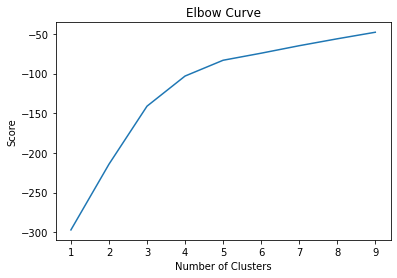

In [10]:
# Plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count for clusters is 4

# 05 k-means clustering

In [11]:
# Create k-means object
kmeans = KMeans(n_clusters = 4) 

In [12]:
# Fit k-means object to data
kmeans.fit(housing_std)

KMeans(n_clusters=4)

In [13]:
# Add cluster column to dataframe
df['clusters'] = kmeans.fit_predict(df)
df.head()

C:\Users\tmmcc\AppData\Local\Temp\ipykernel_5816\2809562242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


dwelling,total_starts,rental_starts,co_op_and_unknown_starts,rental_vacancy_percent,pct_change_new_housing_price_index,pct_change_consumer_price_index,pct_change_owned_accommodation_costs,pct_change_rental_accommodation_costs,july_1_population_thousands,pct_change_employment,pct_change_unemployment,clusters
1990,5560.0,1107.0,332.0,3.8,0.3,5.1,4.7,3.3,910.500000,1.0,10.7,1
1991,5173.0,1691.0,400.0,5.1,-0.2,6.1,4.5,2.8,915.000000,-1.2,12.1,1
1992,4673.0,764.0,268.0,5.7,1.1,0.7,-0.8,1.9,919.500000,-3.1,13.1,1
1993,4282.0,642.0,40.0,6.0,3.0,1.2,-0.5,1.3,923.900024,-0.6,14.3,2
1994,4748.0,671.0,140.0,6.7,2.8,1.1,-0.3,1.3,926.900024,1.7,13.5,1


In [14]:
# Check shape of dataframe
df.shape

(27, 12)

In [15]:
# Check frequency table of clusters
df['clusters'].value_counts()

1    10
2     8
3     6
0     3
Name: clusters, dtype: int64

# 06 Visualize the clusters

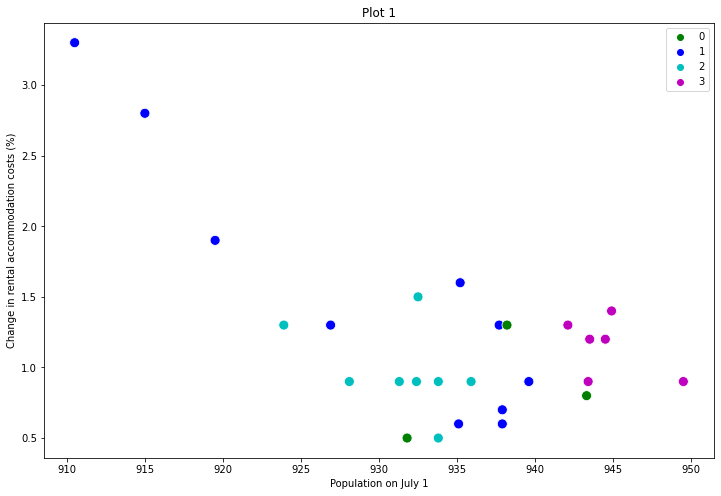

In [16]:
# Plot the clusters for population and rental vacancy
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['july_1_population_thousands'], y=df['pct_change_rental_accommodation_costs'], hue=kmeans.labels_, palette = ['g', 'b', 'c', 'm'], s=100) 
ax.grid(False)
plt.title('Plot 1')
plt.xlabel('Population on July 1')
plt.ylabel('Change in rental accommodation costs (%)')
plt.show()

Plot 1 has the same data plotted in a categorical plot as part of the exploratory visual analysis (notebeook 3). 

Cluster 1 includes the highest percent changes in rental accommodation costs. In the exploratory visual analysis, this was the high vacancy category. This cluster is also restricted to populations below 940 thousand. 

Cluster 3 only includes populations above 940 thousand. The data points in this cluster are in a grouping by themselves.

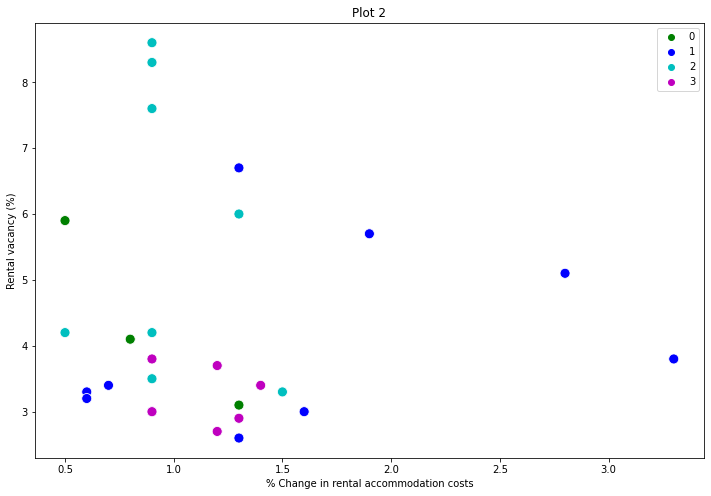

In [17]:
# Plot the clusters for pct change rental costs and rental vacancy
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_change_rental_accommodation_costs'], y=df['rental_vacancy_percent'], hue=kmeans.labels_, palette = ['g', 'b', 'c', 'm'], s=100) 
ax.grid(False)
plt.title('Plot 2')
plt.xlabel('% Change in rental accommodation costs')
plt.ylabel('Rental vacancy (%)')
plt.show()

The highest % changes in rental accommodation costs are all in cluster 1, while the highest percent rental vacancies are in cluster 2. This plot has two groupings of data points, one in the lower left part of the plot, which contains data from all four clusters, and one negative linear trend going diagonally through the plot which only contains data from clusters 1 and 2.

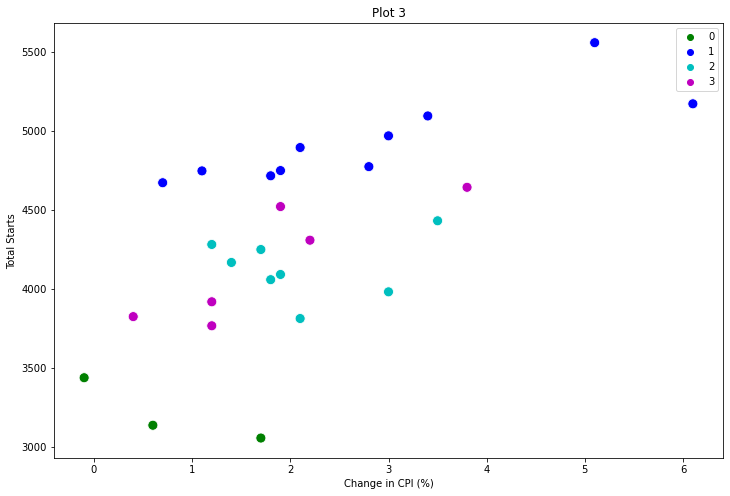

In [18]:
# Plot the clusters for pct change CPI and total starts
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_change_consumer_price_index'], y=df['total_starts'], hue=kmeans.labels_, palette = ['g', 'b', 'c', 'm'], s=100) 
ax.grid(False)
plt.title('Plot 3')
plt.xlabel('Change in CPI (%)')
plt.ylabel('Total Starts')
plt.show()

CPI is the consumer price index.

This plot shows more groupings that match the clusters than the two previous plots. Cluster 0 has the lowest number of total starts and the low % changes in CPI. Cluster 1 has the highest numbers of total starts and a broad range in % change in CPI. Clusters 2 and 3 have the same ranges of total starts, but cluster 3 has a slightly narrower range in % change in CPI. 

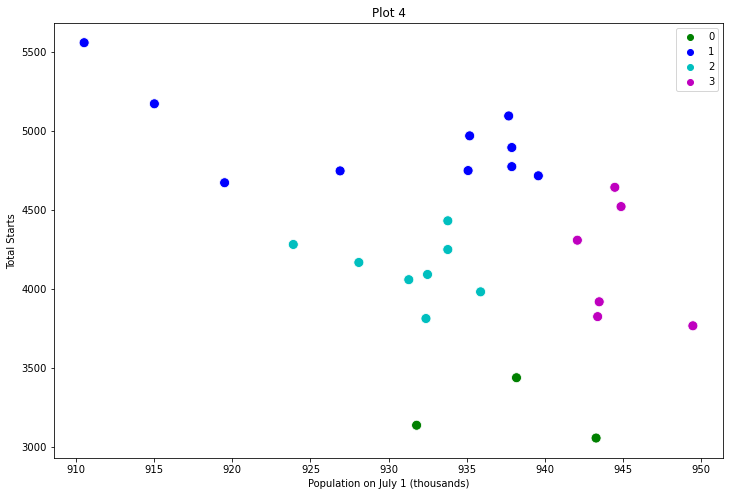

In [19]:
# Plot the clusters for population and total starts
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['july_1_population_thousands'], y=df['total_starts'], hue=kmeans.labels_, palette = ['g', 'b', 'c', 'm'], s=100) 
ax.grid(False)
plt.title('Plot 4')
plt.xlabel('Population on July 1 (thousands)')
plt.ylabel('Total Starts')
plt.show()

Wow, the clusters really cluster in this plot! The fact that total starts has decreased as population increases is alarming and points to the housing crisis, but perhaps the clusters can help explain why. 

Cluster 0 has moderately high populations and low total starts. Cluster 1 has a range of populations (it includes the lowest populations), but only the highest numbers of total starts. So this cluster is probably important for understanding what drives total starts. Cluster 3 has high populations and a moderate number of starts whereas cluster 2 has the same range of total starts, but lower populations.

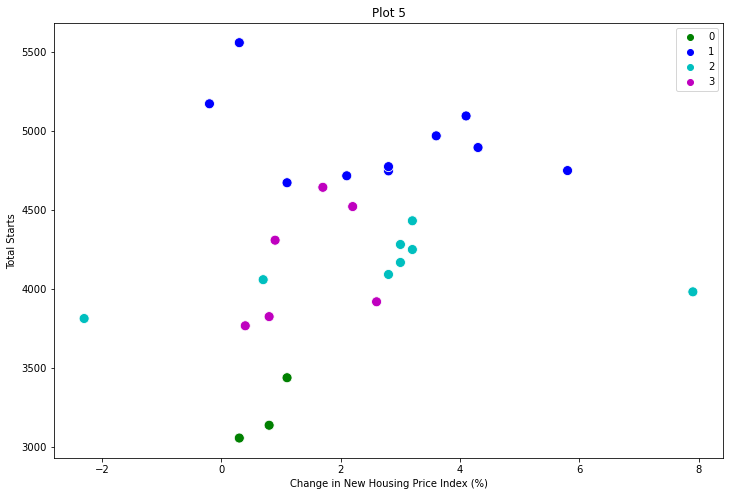

In [20]:
# Plot the clusters for pct change NHPI and total starts
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_change_new_housing_price_index'], y=df['total_starts'], hue=kmeans.labels_, palette = ['g', 'b', 'c', 'm'], s=100) 
ax.grid(False)
plt.title('Plot 5')
plt.xlabel('Change in New Housing Price Index (%)')
plt.ylabel('Total Starts')
plt.show()

Cluster 0 has the lowest positive % change in New Housing Price Index (NHPI) and the lowest total starts. Like in plot 4, Cluster 1 has a broad range on the x-axis (% change in NHPI), but the only highest numbers of total starts. Clusters 2 and 3 'overlap' in their ranges of both total starts and % change in NHPI. Cluster 2 has the only negative % change in NHPI. 

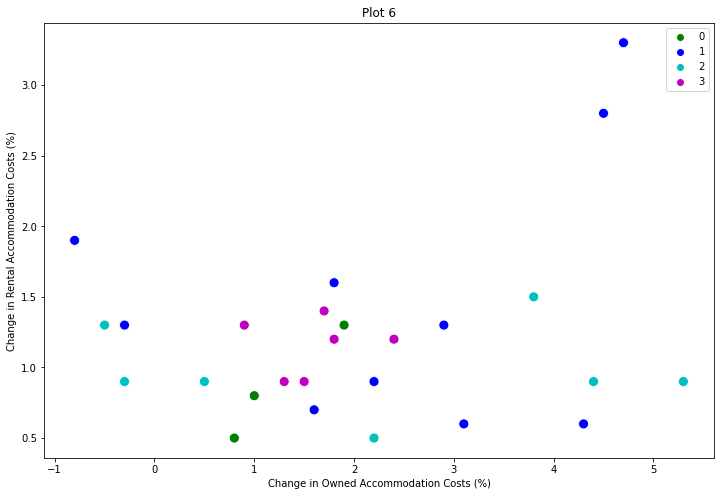

In [21]:
# Plot the clusters for pct change owned accommodation costs and pct change rental accommodation costs
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_change_owned_accommodation_costs'], y=df['pct_change_rental_accommodation_costs'], hue=kmeans.labels_, palette = ['g', 'b', 'c', 'm'], s=100) 
ax.grid(False)
plt.title('Plot 6')
plt.xlabel('Change in Owned Accommodation Costs (%)')
plt.ylabel('Change in Rental Accommodation Costs (%)')
plt.show()

Cluster 1 has the two 'extreme' values of % change in rental accommodation costs, otherwise, there is no distinction between the clusters in this regard. Similarly, the clusters all have broad ranges in % change in owned accommodation costs.

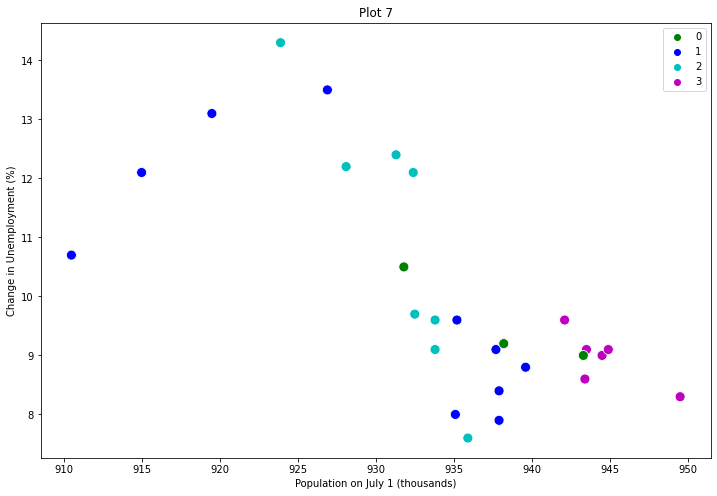

In [22]:
# Plot the clusters for population and pct change unemployment
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['july_1_population_thousands'], y=df['pct_change_unemployment'], hue=kmeans.labels_, palette = ['g', 'b', 'c', 'm'], s=100) 
ax.grid(False)
plt.title('Plot 7')
plt.xlabel('Population on July 1 (thousands)')
plt.ylabel('Change in Unemployment (%)')
plt.show()

What stands out in this plot is that cluster 3 has the highest population values (and a small range in population values), but moderately low % changes in unemployment. The highest % changes in unemployment fall into clusters 1 and 2. The lowest populations are in cluster 1, with cluster 2 having some lower populations than clusters 0 and 3.

# 07 Discussion

A total of eight plots were created to visualize the clustering. The plot titles above are used only as reference for discussion. Some discussion is below each plot.

The clusters make sense when describing the relationships between population, total starts, and % change in rental accommodation costs (plots 3 and 4). More generally, the clusters may point to how housing market indicators respond to population changes. 

This analysis suffers from the low number of observations. 

# 08 Descriptive statistics

In [23]:
# Name the clusters
df.loc[df['clusters'] == 0, 'cluster'] = 'green'
df.loc[df['clusters'] == 1, 'cluster'] = 'blue'
df.loc[df['clusters'] == 2, 'cluster'] = 'cyan'
df.loc[df['clusters'] == 3, 'cluster'] = 'magenta'

C:\Users\tmmcc\AppData\Local\Temp\ipykernel_5816\3607406696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 0, 'cluster'] = 'green'


In [24]:
# Group the data and calculate descriptive statistics
df_stats = round(df.groupby('cluster').agg({
                          'total_starts':['mean', 'median'], 
                          'rental_starts':['mean', 'median'],
                          'july_1_population_thousands':['mean', 'median'],
                          'rental_vacancy_percent':['mean', 'median'],
                          'pct_change_new_housing_price_index':['mean', 'median'],
                          'pct_change_consumer_price_index':['mean', 'median'],
                          'co_op_and_unknown_starts':['mean', 'median'],
                          'pct_change_owned_accommodation_costs':['mean', 'median'],
                          'pct_change_rental_accommodation_costs':['mean', 'median'],
                          'pct_change_employment':['mean', 'median'],
                          'pct_change_unemployment':['mean', 'median'],
                         }))

In [25]:
# Show the descriptive statistics
pd.set_option('display.max_columns', None)
df_stats

dwelling total_starts         rental_starts          \
                 mean  median          mean  median   
cluster                                               
blue           4936.0  4836.0         912.0   840.0   
cyan           4135.0  4130.0         593.0   606.0   
green          3210.0  3137.0         721.0   655.0   
magenta        4164.0  4114.0        1496.0  1523.0   

dwelling july_1_population_thousands        rental_vacancy_percent         \
                                mean median                   mean median   
cluster                                                                     
blue                           930.0  935.0                    4.0    3.0   
cyan                           931.0  932.0                    6.0    5.0   
green                          938.0  938.0                    4.0    4.0   
magenta                        945.0  944.0                    3.0    3.0   

dwelling pct_change_new_housing_price_index         \
                                       mean median   
cluster                                              
blue                                    3.0    3.0   
cyan                                    3.0    3.0   
green                                   1.0    1.0   
magenta                                 1.0    1.0   

dwelling pct_change_consumer_price_index        co_op_and_unknown_starts  \
                                    mean median                     mean   
cluster                                                                    
blue                                 3.0    2.0                    115.0   
cyan                                 2.0    2.0                      9.0   
green                                1.0    1.0                     17.0   
magenta                              2.0    2.0                     26.0   

dwelling        pct_change_owned_accommodation_costs         \
         median                                 mean median   
cluster                                                       
blue        6.0                                  2.0    3.0   
cyan        1.0                                  2.0    2.0   
green       0.0                                  1.0    1.0   
magenta     0.0                                  2.0    2.0   

dwelling pct_change_rental_accommodation_costs        pct_change_employment  \
                                          mean median                  mean   
cluster                                                                       
blue                                       2.0    1.0                   1.0   
cyan                                       1.0    1.0                   1.0   
green                                      1.0    1.0                   1.0   
magenta                                    1.0    1.0                   0.0   

dwelling        pct_change_unemployment         
         median                    mean median  
cluster                                         
blue        1.0                    10.0    9.0  
cyan        1.0                    11.0   11.0  
green      -0.0                    10.0    9.0  
magenta     0.0                     9.0    9.0

The cyan cluster has the highest mean rental vacancy (%), the highest mean % change in unemployment, and the second-lowest mean population.

The blue cluster has the highest mean total starts and the highest mean co-op/unknown housing starts, the lowest population, and the highest mean % change in CPI. Which of these (if any) is causal is an important question.

The magenta cluster has the highest mean population, the highest mean rental starts, and the second highest mean total starts.

It seems like owned housing and rental housing markets do not act in the same way. The rental market may be more responsive to population growth, while the housing market may be more responsive (or reactive) to increases in the consumer price index.

# 09 Future steps

Separating this analysis into two groups, rental and ownership, might be useful for understanding each of those housing markets. This dataset might be a good candidate for Principle Component Analysis. 

Understanding the time windows of each of these clusters could be important. Does the blue cluster represent the oldest data and the magenta the newest data? 

This data will be used for time series analysis, and based on these results, I will focus on population, total starts, and % change in rental accommodation costs. The interpretation of the time series analysis (and any forecasting) should be in the context of these clusters.

It would be good to compare Nova Scotians housing costs, as a percentage of their after-tax income, over the same period (this data would need to be sourced from Statistics Canada tables, as the CIS PUMF used for this project only covers 2018). Do any of these factors correlate to the percentage of Nova Scotians paying more than 35% of their after-tax income on housing (this is the CMHC's definition of affordable housing)? 

# 10 Export dataframe for time series analysis

In [26]:
# Export data to pkl
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'NSHousing_clustered.pkl'))